### Cross validation 

- A classic and popular approach for estimating the generalization performance of machine learning models is holdout cross-validation. Using the holdout method, we split our initial dataset into separate training and test datasets — the former is used for model training, and the latter is used to estimate its generalization performance. However, in typical machine learning applications, we are also interested in tuning and comparing different parameter settings to further improve the performance for making predictions on unseen data. This process is called model selection, with the name referring to a given classification problem for which we want to select the optimal values of tuning parameters (also called hyperparameters). However, if we reuse the same test dataset over and over again during model selection, it will become part of our training data and thus the model will be more likely to overfit. Despite this issue, many people still use the test dataset for model selection, which is not a good machine learning practice.

- A better way of using the holdout method for model selection is to separate the data into three parts: a training dataset, a validation dataset, and a test dataset. The training dataset is used to fit the different models, and the performance on the validation dataset is then used for the model selection. The advantage of having a test dataset that the model hasn’t seen before during the training and model selection steps is that we can obtain a less biased estimate of its ability to generalize to new data. 



- The following figure illustrates the concept of holdout cross-validation, where we use a validation dataset to repeatedly evaluate the performance of the model after training using different hyperparameter values. Once we are satisfied with the tuning of hyperparameter values, we estimate the model’s generalization performance on the test dataset:

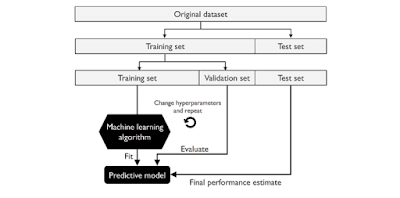

### What is Cross Validation?
Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it.

Here are the steps involved in cross validation:

- You reserve a sample data set

- Train the model using the remaining part of the dataset

- Use the reserve sample of the test (validation) set. This will help you in gauging the effectiveness of your model’s performance. If your model delivers a positive result on validation data, go ahead with the current model. It rocks!

---- it’s like before sitting in the main exam you solving previous year papers to perform well in the main exam. This is not the exact definition of cross-validation but one way to look at it and understand it.

- Cross-validation is a statistical method used to estimate the performance of machine learning models. It is a method for assessing how the results of a statistical analysis will generalize to an independent data set.

### Purpose of Cross-Validations
Cross-validation is a machine learning approach in which the training data is partitioned into two sets: one for training and one for testing. The training set is used to construct the model, while the test set is used to assess the model’s performance in production. This is because there is a possibility that the model you have constructed will not perform well in the actual world. Without cross-validation, there is a danger that you may build a model that performs well on training data but not on real-world data.

### Significance of Cross validation Method 

Whenever we build any machine learning model, we feed it with initial data to train the model. And then we feed some unknown data (test data) to understand how well the model performs and generalized over unseen data. If the model performs well on the unseen data, it’s consistent and is able to predict with good accuracy on a wide range of input data; then this model is stable.

But this is not the case always! Machine learning models are not always stable and we have to evaluate the stability of the machine learning model. That is where Cross Validation comes into the picture.

#### Note : BASICALLY IT HANDLES UNSTABILITY ON THE MODEL i.e either underfitting and overfitting and regulates acceptability the tradeoff between bias and variance

Why do models lose stability?
Let’s understand this using the below snapshot illustrating the fit of various models:


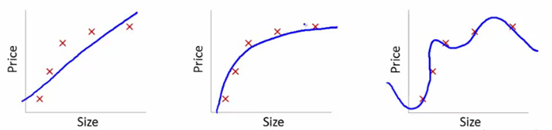
Here, we are trying to find the relationship between size and price. To achieve this, we have taken the following steps:

We’ve established the relationship using a linear equation for which the plots have been shown. The first plot has a high error from training data points. Therefore, this will not perform well on either public or the private leaderboard. This is an example of “Underfitting”. In this case, our model fails to capture the underlying trend of the data
In the second plot, we just found the right relationship between price and size, i.e., low training error and generalization of the relationship
In the third plot, we found a relationship which has almost zero training error. This is because the relationship is developed by considering each deviation in the data point (including noise), i.e., the model is too sensitive and captures random patterns which are present only in the current dataset. This is an example of “Overfitting”. In this relationship, there could be a high deviation between the public and private leaderboards
A common practice in data science competitions is to iterate over various models to find a better performing model. However, it becomes difficult to distinguish whether this improvement in score is coming because we are capturing the relationship better, or we are just over-fitting the data. To find the right answer for this question, we use validation techniques. This method helps us in achieving more generalized relationships.

One of the key steps in building a machine learning model is to estimate its performance on data that the model hasn’t seen before.Let’s assume that we fit our model on a training dataset and use the same data to estimate how well it performs on new data.The model can suffer from underfitting (high bias) if the model is too simple, or it can overfit the training data (high variance) if the model is too complex for the underlying training data.To find an acceptable bias-variance tradeoff, we need to evaluate our model carefully.

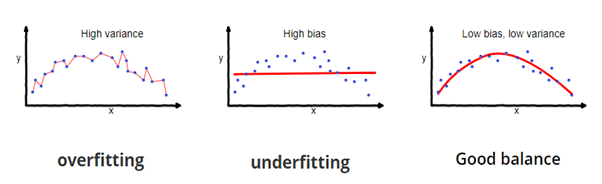

### Types of Cross-Validations
-  Holdout Method

-  LOOV

-  K-fold



### 1. Holdout Method
This is the simplest evaluation method and is widely used in Machine Learning projects. Here the entire dataset(population) is divided into 2 sets – train set and test set. The data can be divided into 70-30 or 60-40, 75-25 or 80-20, or even 50-50 depending on the use case. As a rule, the proportion of training data has to be larger than the test data.

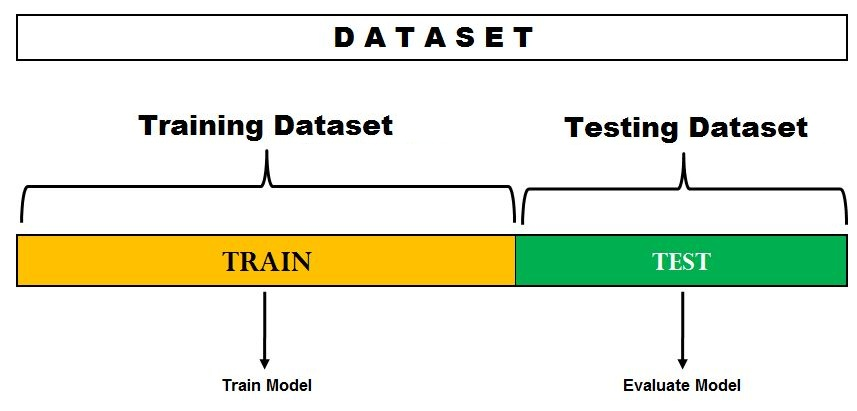


The data split happens randomly, and we can’t be sure which data ends up in the train and test bucket during the split unless we specify random_state. This can lead to extremely high variance and every time, the split changes, the accuracy will also change.

Pros:

1. **Quick To Execute:** As we have to split the dataset into training and validation set just once and the model will be built just once on the training set so gets executed quickly.

CONS

- Not Suitable for an imbalanced dataset: Suppose we have an imbalanced dataset that has class ‘0’ and class ‘1’. Let’s say 80% of data belongs to class ‘0’ and the remaining 20% data to class ‘1’.On doing train-test split with train set size as 80% and test data size as 20% of the dataset. It may happen that all 80% data of class ‘0’ may be in the training set and all data of class ‘1’ in the test set. So our model will not generalize well for our test data as it hasn’t seen data of class ‘1’ before(creates high variance)
- holdout method is that the performance estimate may be very sensitive to how we partition the training dataset into the training and validation subsets; the estimate will vary for different examples of the data.
- In the Hold out method, the test error rates are highly variable (high variance) and it totally depends on which observations end up in the training set and test set
- Only a part of the data is used to train the model (high bias) which is not a very good idea when data is not huge and this will lead to overestimation of test error.(creates high bias)

In [1]:
## hold out method(cons) : high variance and high bias

In [5]:
## eg :
from sklearn.model_selection import train_test_split
X = [10,20,30,40,50,60,70,80,90,100]
train, test= train_test_split(X,test_size=0.3,)
print(train)
print(test)


[80, 10, 90, 20, 100, 70, 50]
[40, 30, 60]


In [5]:
## eg :
from sklearn.model_selection import train_test_split
X = ['yes','yes','No','yes','yes','yes','yes','yes','yes','No']
train, test= train_test_split(X,test_size=0.3,)
print(train)
print(test)


['No', 'No', 'yes', 'yes', 'yes', 'yes', 'yes']
['yes', 'yes', 'yes']


### 2. Leave One Out Cross-Validation

In this method, we divide the data into train and test sets – but with a twist. Instead of dividing the data into 2 subsets, we select a single observation as test data, and everything else is labeled as training data and the model is trained. Now the 2nd observation is selected as test data and the model is trained on the remaining data.

BASICALLY , we reserve only one data point from the available dataset, and train the model on the rest of the data. This process iterates for each data point

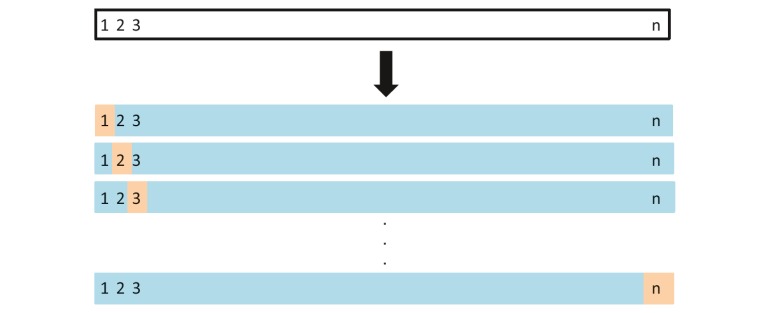

This process continues ‘n’ times and the average of all these iterations is calculated and estimated as the test set error.

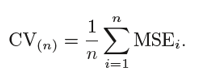

#### PROS AND CONS

- We make use of all data points, hence the bias will be low(When it comes to test-error estimates, LOOCV gives unbiased estimates (low bias). But bias is not the only matter of concern in estimation problems. We should also consider variance.)
- We repeat the cross validation process n times (where n is number of data points) which results in a higher execution time
- This approach leads to higher variation in testing model effectiveness because we test against one data point. So, our estimation gets highly influenced by the data point. If the data point turns out to be an outlier, it can lead to a higher variation
- LOOCV has an extremely high variance because we are averaging the output of n-models which are fitted on an almost identical set of observations, and their outputs are highly positively correlated with each other.(since training data is overlapped so leads to high variance)


In [ ]:
## loov cons: high variance (overlapping the data points in the iterations)and high complexity wrt to iterrtions
## loov pros : low bias (by taking single data point as test )

In [7]:
## EG :
from sklearn.model_selection import LeaveOneOut
a = [0,1,2,3,4,5,6,7,8,9]

l = LeaveOneOut()

for train, test in l.split(a):

    print("%s %s"% (train,test))
    
    

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


This output clearly shows how LOOCV keeps one observation aside as test data and all the other observations go to train data.

From the above two validation methods, we’ve learnt:

- We should train the model on a large portion of the dataset. Otherwise we’ll fail to read and recognise the underlying trend in the data. This will eventually result in a higher bias

- We also need a good ratio of testing data points. As we have seen above, less amount of data points can lead to a variance error while testing the effectiveness of the model

- We should iterate on the training and testing process multiple times. We should change the train and test dataset distribution. This helps in validating the model effectiveness properly

Do we have a method which takes care of all these 3 requirements?

Yes! That method is known as “k-fold cross validation”. It’s easy to follow and implement.
basically ,  It is robust technique for performance estimation, k-fold cross-validation, where we repeat the holdout method k times on k subsets of the training data.

#### Below are the steps for it:`

- Randomly split your entire dataset into k”folds”
- For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
- Record the error you see on each of the predictions
- Repeat this until each of the k-folds has served as the test set
- The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

### 3. K-Fold Cross-Validation
It is sa random sampling technique, the whole data is divided into k sets of almost equal sizes. The first set is selected as the test set and the model is trained on the remaining k-1 sets. The test error rate is then calculated after fitting the model to the test data.

In the second iteration, the 2nd set is selected as a test set and the remaining k-1 sets are used to train the data and the error is calculated. This process continues for all the k sets.

In this technique of K-Fold cross-validation, the whole dataset is partitioned into K parts of equal size. Each partition is called a “Fold“.So as we have K parts we call it K-Folds. One Fold is used as a validation set and the remaining K-1 folds are used as the training set.

The technique is repeated K times until each fold is used as a validation set and the remaining folds as the training set.

The final accuracy of the model is computed by taking the mean accuracy of the k-models validation data.
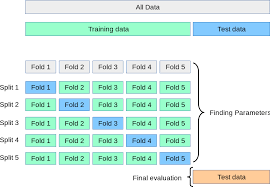

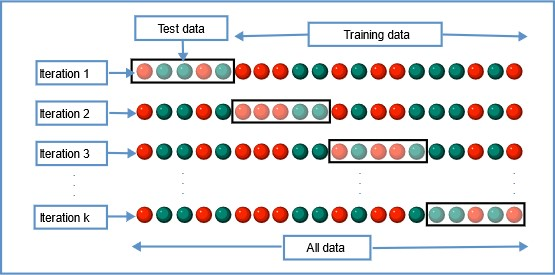

The mean of errors from all the iterations is calculated as the CV test error estimate.`

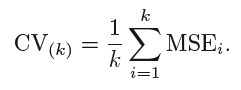

### How to choose the right value of k?

- The no. of folds k is less than the number of observations in the data (k<n) and we are averaging the outputs of k fitted models that are somewhat less correlated with each other since the overlap between the training sets in each model is smaller. This leads to low variance then LOOCV.

- Generally, K-fold Cross Validation is performed using k=5 or k=10 as these values have been empirically shown to yield test error estimates that neither have high bias nor high variance.(means at this value we achine low variance and low bias) 

- Always remember, a lower value of k is more biased, and hence undesirable. On the other hand, a higher value of K is less biased, but can suffer from large variability. It is important to know that a smaller value of k always takes us towards validation set approach, whereas a higher value of k leads to LOOCV approach.



In [1]:
##eg:
from sklearn.model_selection import KFold
X = ["a",'b','c','d',"e","f","g",'h','i','j']

kf = KFold(n_splits=5, shuffle=False)  # with replacement

for train, test in kf.split(X):

    print("Train data",train,"Test data",test)

Train data [2 3 4 5 6 7 8 9] Test data [0 1]
Train data [0 1 4 5 6 7 8 9] Test data [2 3]
Train data [0 1 2 3 6 7 8 9] Test data [4 5]
Train data [0 1 2 3 4 5 8 9] Test data [6 7]
Train data [0 1 2 3 4 5 6 7] Test data [8 9]


Pros:

1. The whole dataset is used as both a training set and validation set
2. The best part about this method is each data point gets to be in the test set exactly once and gets to be part of the training set k-1 times. As the number of folds k increases, the variance also decreases (low variance). This method leads to intermediate bias because each training set contains fewer observations (k-1)n/k than the Leave One Out method but more than the Hold Out method.

Cons:

1. Not to be used for imbalanced datasets: As discussed in the case of HoldOut cross-validation, in the case of K-Fold validation too it may happen that all samples of training set will have no sample form class “1” and only of class “0”.And the validation set will have a sample of class “1”.

2. Not suitable for Time Series data: For Time Series data the order of the samples matter. But in K-Fold Cross-Validation, samples are selected in random order.

3. the model has to be run from scratch k-times and is computationally expensive than the Hold Out method but better than the Leave One Out method

### Bias – Variance Tradeoff
When we consider the test error rate estimates, K-Fold Cross Validation gives more accurate estimates than Leave One Out Cross-Validation. Whereas Hold One Out CV method usually leads to overestimates of the test error rate, because in this approach, only a portion of the data is used to train the machine learning model.

When it comes to bias, the Leave One Out Method gives unbiased estimates because each training set contains n-1 observations (which is pretty much all of the data). K-Fold CV leads to an intermediate level of bias depending on the number of k-folds when compared to LOOCV but it’s much lower when compared to the Hold Out Method.

To conclude, the Cross-Validation technique that we choose highly depends on the use case and bias-variance trade-off.